# Summary

We looked at super winners (componded more thant 20% per year) in the last 10 years. Not much can be said given the selection bias. One learning is that even for those super winners, there are preiods when the valuation is low. Such are the good time to buy.

In [7]:
from fmp_fetch.fmp_online import FMPOnline
from fmp_fetch.online_dataset import Dataset


In [3]:
symbols = ['TPL', 'CNSWF', 'LRN', 'ISRG', 'HEI', 'COST', 'ORLY', 'AZO', 'CTAS']

data = Dataset(symbols=symbols, metrics=['close_price', 'price_to_fcf', 'pe'], start_date='2014-01-01', end_date='2025-01-20').data
data = data.dropna()


2025-05-05 19:38:55 - online_dataset.py:216 - INFO - Fetching price data for 9 symbols from 2014-01-01 to 2025-01-20
100%|██████████| 9/9 [00:09<00:00,  1.06s/it]
2025-05-05 19:39:04 - online_dataset.py:166 - INFO - Fetching income_statement for 9 symbols
100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
2025-05-05 19:39:18 - online_dataset.py:166 - INFO - Fetching cashflow_statement for 9 symbols
100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
2025-05-05 19:39:32 - online_dataset.py:244 - INFO - Computing PE ratios
2025-05-05 19:39:40 - online_dataset.py:299 - INFO - Computing price to FCF ratios


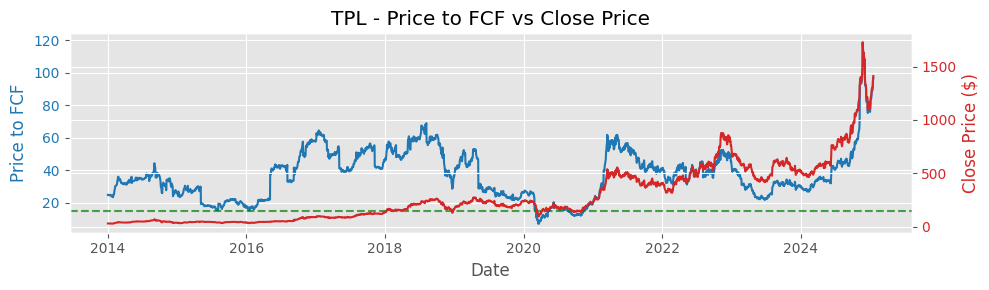

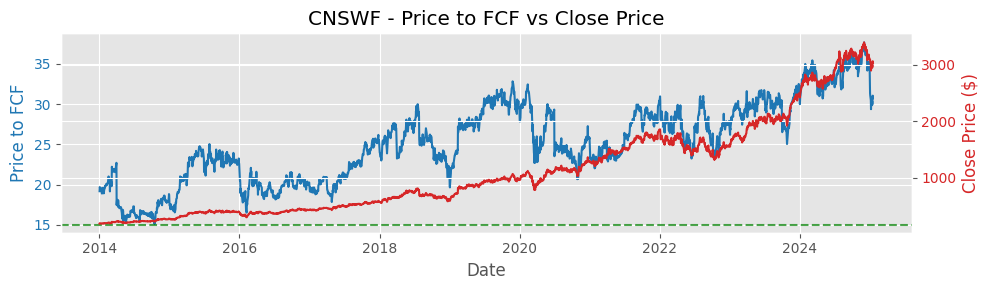

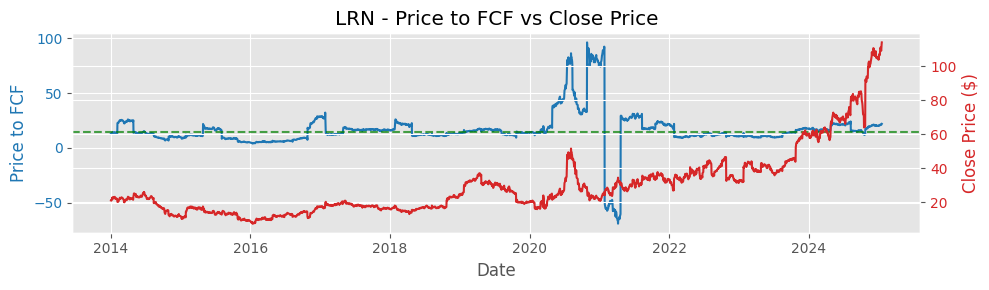

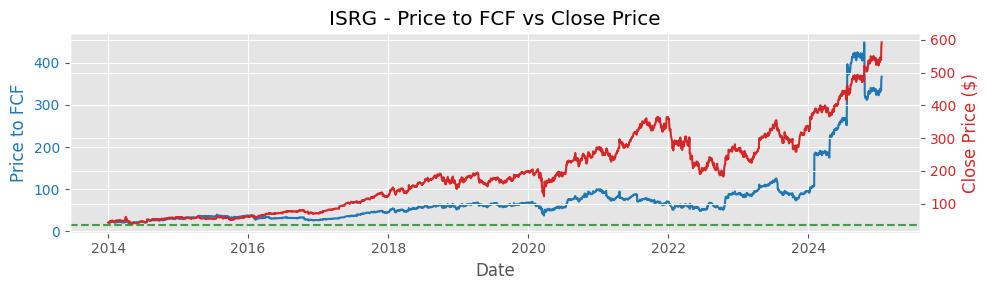

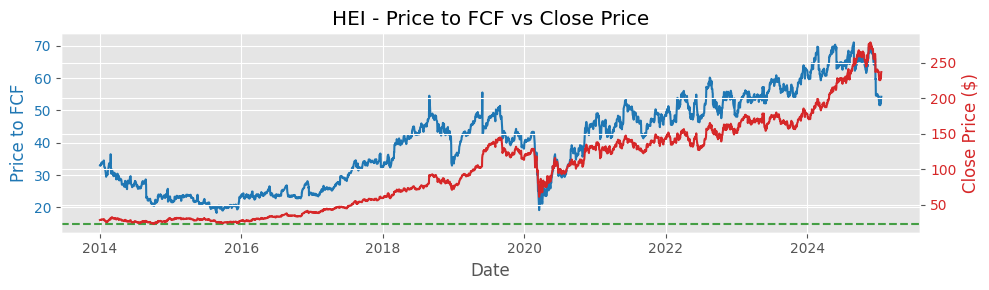

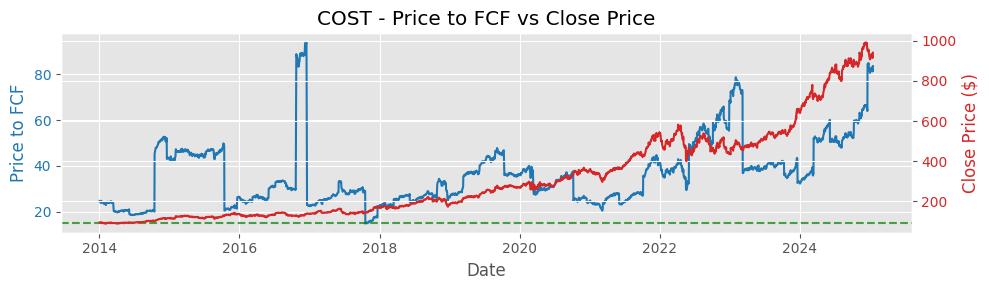

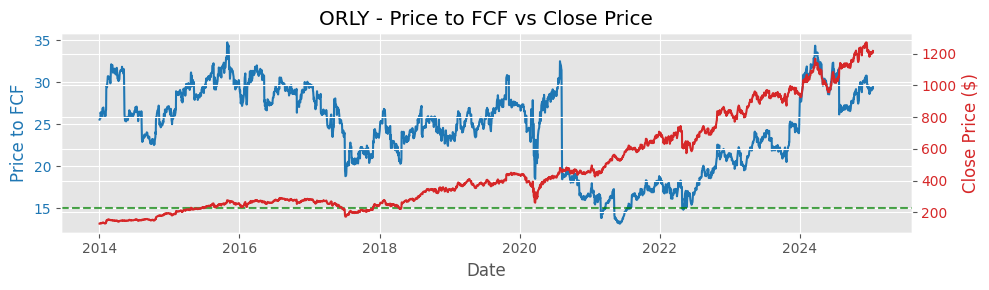

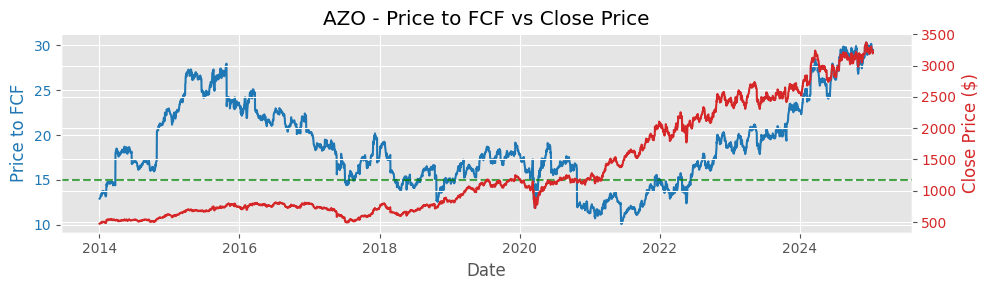

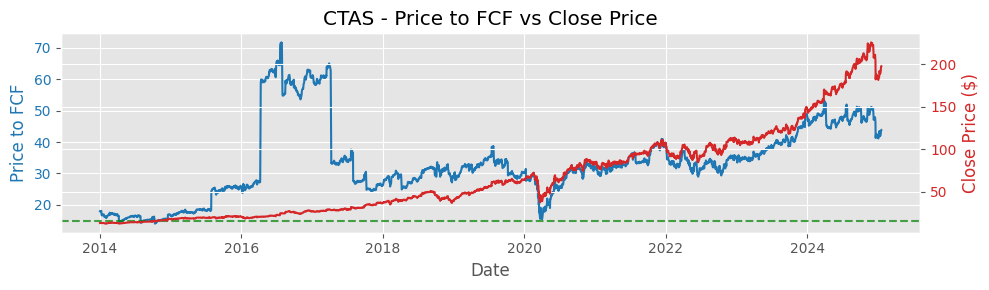

In [5]:
symbols = ['TPL', 'CNSWF', 'LRN', 'ISRG', 'HEI', 'COST', 'ORLY', 'AZO', 'CTAS']

for sym in symbols:
    t = data.xs(sym, level='symbol')
    # Plot price_to_fcf and close_price
    fig, ax1 = plt.subplots(figsize=(10, 3))
    
    # Plot price_to_fcf on left y-axis
    color = 'tab:blue'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Price to FCF', color=color)
    ax1.plot(t.index, t.price_to_fcf, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    
    # Add horizontal line at price_to_fcf = 15
    ax1.axhline(y=15, color='green', linestyle='--', alpha=0.7)
    
    # Create second y-axis for close_price
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Close Price ($)', color=color)
    ax2.plot(t.index, t.close_price, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    
    plt.title(f'{sym} - Price to FCF vs Close Price')
    plt.tight_layout()
    plt.show()
